## Neural activity and Stimuli from Allen datasets (Extraction, Computation, and Vis)


### Libraries and Data loading

In [1]:
%load_ext autoreload

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# warnings from jupyter notebook
import warnings
warnings.filterwarnings('ignore')

%autoreload 2

In [2]:
# Install allensdk! 
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession

In [3]:
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
! ls -l /mnt/gs/departmentN4/AllenVisualCoding/data_boris/

total 76603281
-rwxrwx--- 1 root       departmentn4 1862261144 May 26  2020 1026123377
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123377_
-rwxrwx--- 1 root       departmentn4 1859545192 May 26  2020 1026123537
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123537_
-rwxrwx--- 1 root       departmentn4 2912508032 May 26  2020 1026123599
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123599_
-rwxrwx--- 1 root       departmentn4 1960982972 May 26  2020 1026123651
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123651_
-rwxrwx--- 1 root       departmentn4 2376304984 May 26  2020 1026123685
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123685_
-rwxrwx--- 1 root       departmentn4 1736516600 May 26  2020 1026123696
drwxrws--- 2 sotomayorb departmentn4       4096 Sep  7  2021 1026123696_
-rwxrwx--- 1 root       departmentn4 2198584804 May 26  2020 1026123877
drwxrws--- 2 sotomayorb departmentn4       

In [5]:
# Load downloaded session
base_path = '/mnt/gs/departmentN4/AllenVisualCoding/data_boris/'
#base_path = '/mnt/gs/home/sotomayorb/git/AllenSDK_datasets/datasets/' # Remove this line!

sess_name = '1026124216'

session = EcephysSession.from_nwb_path('%s/%s' % (base_path, sess_name))
print ("Session loaded: `%s`" % sess_name)

Session loaded: `1026124216`


In [6]:
session.units

,L_ratio,presence_ratio,d_prime,waveform_halfwidth,cluster_id,firing_rate,peak_channel_id,silhouette_score,waveform_repolarization_slope,waveform_amplitude,...,probe_vertical_position,probe_horizontal_position,probe_id,channel_local_index,ecephys_structure_id,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951814884,0.024771,0.99,3.555518,0.096147,6,9.492176,850126382,0.033776,0.673650,187.434780,...,60,43,760640083,4,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951814876,0.001785,0.99,4.445414,0.206030,5,39.100557,850126382,0.108908,0.518633,129.686505,...,60,43,760640083,4,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815032,0.035654,0.99,3.848256,0.096147,17,28.383277,850126398,0.096715,0.766347,207.380940,...,140,43,760640083,12,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815275,0.016783,0.99,3.065938,0.096147,30,5.709358,850126416,0.144249,0.628944,158.158650,...,220,11,760640083,21,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815314,0.009666,0.99,4.198612,0.123618,34,23.902235,850126420,0.111106,0.740222,173.475705,...,240,27,760640083,23,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951814089,0.032323,0.99,3.194123,0.192295,138,6.579819,850122942,0.046354,0.285857,101.803065,...,1560,59,760640104,154,417.0,probeF,See electrode locations,30000.023099,1250.000962,True
951814212,0.235540,0.99,2.005153,0.137353,149,8.288338,850122968,0.044749,0.248256,77.300730,...,1680,27,760640104,167,417.0,probeF,See electrode locations,30000.023099,1250.000962,True
951814199,0.001055,0.99,6.563771,0.151089,148,2.653770,850122968,0.201445,0.384777,139.877010,...,1680,27,760640104,167,417.0,probeF,See electrode locations,30000.023099,1250.000962,True


---

### Stimulus presentation

Text(0.5, 0, 'Time')

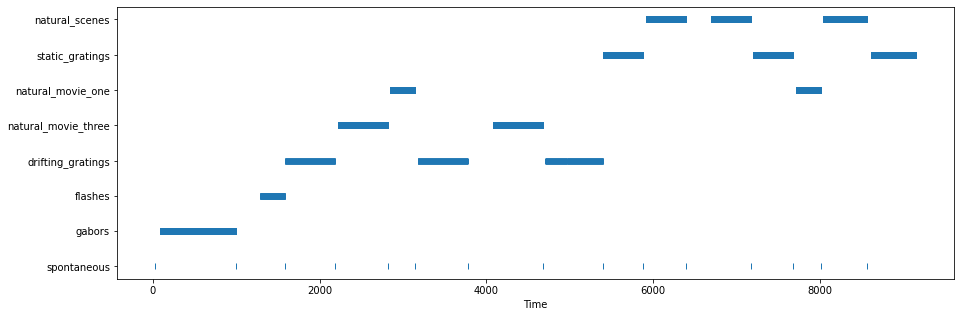

In [7]:
plt.figure(figsize=(15,5))
plt.plot(
    session.stimulus_presentations.start_time, 
    session.stimulus_presentations.stimulus_name,
    marker= '|', linestyle=''
    )

plt.xlabel("Time")

In [8]:
session.stimulus_presentations[ session.stimulus_presentations.stimulus_name == 'natural_movie_one' ]

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
22000,null,1,0,0,null,"[1920.0, 1080.0]",null,2846.788598,4,natural_movie_one,2846.821959,null,null,null,0.033361,3887
22001,null,1,1,0,null,"[1920.0, 1080.0]",null,2846.821959,4,natural_movie_one,2846.855320,null,null,null,0.033361,3888
22002,null,1,2,0,null,"[1920.0, 1080.0]",null,2846.855320,4,natural_movie_one,2846.888681,null,null,null,0.033361,3889
22003,null,1,3,0,null,"[1920.0, 1080.0]",null,2846.888681,4,natural_movie_one,2846.922042,null,null,null,0.033361,3890
22004,null,1,4,0,null,"[1920.0, 1080.0]",null,2846.922042,4,natural_movie_one,2846.955403,null,null,null,0.033361,3891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66113,null,1,895,0,null,"[1920.0, 1080.0]",null,8010.955485,12,natural_movie_one,8010.988846,null,null,null,0.033361,4782
66114,null,1,896,0,null,"[1920.0, 1080.0]",null,8010.988846,12,natural_movie_one,8011.022206,null,null,null,0.033361,4783
66115,null,1,897,0,null,"[1920.0, 1080.0]",null,8011.022206,12,natural_movie_one,8011.055567,null,null,null,0.033361,4784


In [37]:
session.stimulus_presentations.keys()

Index(['color', 'contrast', 'frame', 'orientation', 'phase', 'size',
       'spatial_frequency', 'start_time', 'stimulus_block', 'stimulus_name',
       'stop_time', 'temporal_frequency', 'x_position', 'y_position',
       'duration', 'stimulus_condition_id'],
      dtype='object')

In [ ]:
my_selection = {}

In [ ]:
stimulus_name

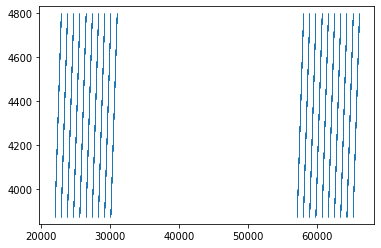

In [9]:
plt.plot(
    session.stimulus_presentations.stimulus_condition_id[ session.stimulus_presentations.stimulus_name == 'natural_movie_one' ],
    marker='|', ls=''
)

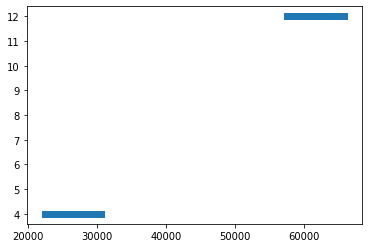

In [10]:
plt.plot(
    session.stimulus_presentations.stimulus_block[ session.stimulus_presentations.stimulus_name == 'natural_movie_one' ],
    marker='|', ls=''
)

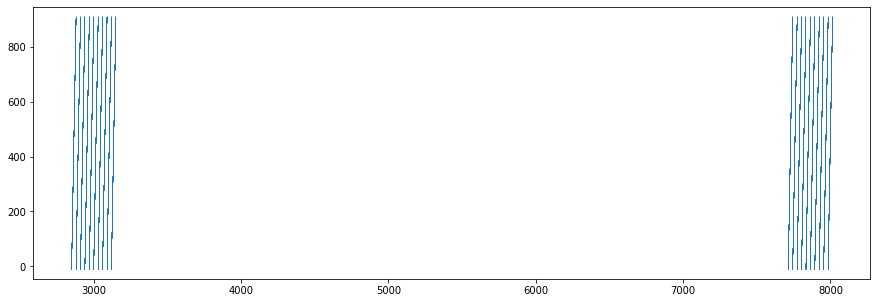

In [11]:
plt.figure(figsize=(15,5));
plt.plot(
    session.stimulus_presentations.start_time[ session.stimulus_presentations.stimulus_name == 'natural_movie_one' ],
    session.stimulus_presentations.frame[ session.stimulus_presentations.stimulus_name == 'natural_movie_one' ],
    marker='|', ls=''
)

In [12]:
NS_table = session.stimulus_presentations[
    (session.stimulus_presentations.stimulus_name == 'natural_scenes')
]

In [13]:
NS_table

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
51355,null,null,95,null,null,null,null,5909.365398,9,natural_scenes,5909.615606,null,null,null,0.250208,4908
51356,null,null,87,null,null,null,null,5909.615606,9,natural_scenes,5909.865814,null,null,null,0.250208,4909
51357,null,null,72,null,null,null,null,5909.865814,9,natural_scenes,5910.116023,null,null,null,0.250208,4910
51358,null,null,41,null,null,null,null,5910.116023,9,natural_scenes,5910.366231,null,null,null,0.250208,4911
51359,null,null,9,null,null,null,null,5910.366231,9,natural_scenes,5910.616443,null,null,null,0.250212,4912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68224,null,null,81,null,null,null,null,8567.837656,13,natural_scenes,8568.087864,null,null,null,0.250208,4927
68225,null,null,17,null,null,null,null,8568.087864,13,natural_scenes,8568.338073,null,null,null,0.250208,5011
68226,null,null,113,null,null,null,null,8568.338073,13,natural_scenes,8568.588281,null,null,null,0.250208,4944


**NWB to Numpy**

In [14]:
l_stim_start_time  = np.array(NS_table['start_time']) # Stimulus onset
l_stim_orientation = np.array(NS_table['orientation'])           # Natural Image ID
duration = 0.25 # seconds

In [16]:
#print ("Number of natural scenes         : %i" % len(set(l_stim_frame)))
#print ("Number of presentations per image: %i" % (len(l_stim_frame)/len(set(l_stim_frame))))

---

### Accessing neurons and spiketimes

In [17]:
"total neurons in this session", len(session.spike_times.keys())

('total neurons in this session', 684)

In [18]:
neurons = session.units

In [19]:
neurons

,L_ratio,presence_ratio,d_prime,waveform_halfwidth,cluster_id,firing_rate,peak_channel_id,silhouette_score,waveform_repolarization_slope,waveform_amplitude,...,probe_vertical_position,probe_horizontal_position,probe_id,channel_local_index,ecephys_structure_id,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951814884,0.024771,0.99,3.555518,0.096147,6,9.492176,850126382,0.033776,0.673650,187.434780,...,60,43,760640083,4,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951814876,0.001785,0.99,4.445414,0.206030,5,39.100557,850126382,0.108908,0.518633,129.686505,...,60,43,760640083,4,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815032,0.035654,0.99,3.848256,0.096147,17,28.383277,850126398,0.096715,0.766347,207.380940,...,140,43,760640083,12,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815275,0.016783,0.99,3.065938,0.096147,30,5.709358,850126416,0.144249,0.628944,158.158650,...,220,11,760640083,21,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
951815314,0.009666,0.99,4.198612,0.123618,34,23.902235,850126420,0.111106,0.740222,173.475705,...,240,27,760640083,23,215.0,probeA,See electrode locations,29999.949611,1249.997900,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951814089,0.032323,0.99,3.194123,0.192295,138,6.579819,850122942,0.046354,0.285857,101.803065,...,1560,59,760640104,154,417.0,probeF,See electrode locations,30000.023099,1250.000962,True
951814212,0.235540,0.99,2.005153,0.137353,149,8.288338,850122968,0.044749,0.248256,77.300730,...,1680,27,760640104,167,417.0,probeF,See electrode locations,30000.023099,1250.000962,True
951814199,0.001055,0.99,6.563771,0.151089,148,2.653770,850122968,0.201445,0.384777,139.877010,...,1680,27,760640104,167,417.0,probeF,See electrode locations,30000.023099,1250.000962,True


In [20]:
l_n_ids  = np.array(neurons.index) # list of neuron's IDs
print ("Total neurons: %s" % l_n_ids.shape[0])

Total neurons: 684


In [21]:
print ("List of properties", neurons.keys())

List of properties Index(['L_ratio', 'presence_ratio', 'd_prime', 'waveform_halfwidth',
       'cluster_id', 'firing_rate', 'peak_channel_id', 'silhouette_score',
       'waveform_repolarization_slope', 'waveform_amplitude', 'snr',
       'waveform_velocity_below', 'max_drift', 'nn_miss_rate', 'nn_hit_rate',
       'waveform_velocity_above', 'waveform_spread', 'amplitude_cutoff',
       'waveform_duration', 'waveform_PT_ratio', 'cumulative_drift',
       'isolation_distance', 'isi_violations', 'waveform_recovery_slope',
       'local_index_unit', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'ecephys_structure_acronym', 'probe_vertical_position',
       'probe_horizontal_position', 'probe_id', 'channel_local_index',
       'ecephys_structure_id', 'probe_description', 'location',
       'probe_sampling_rate', 'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')


**Spike times**

In [22]:
l_spike_times = np.array([ session.spike_times[n_id] for n_id in l_n_ids ]) #dex#[l_n_ids]

In [23]:
print("spike times:", l_spike_times)

spike times: [array([3.80928400e+00, 3.84358406e+00, 3.94235089e+00, ...,
       9.94395425e+03, 9.96080897e+03, 9.96476828e+03])
 array([3.82861736e+00, 3.87158410e+00, 3.90445082e+00, ...,
       9.96614322e+03, 9.96616348e+03, 9.96618938e+03])
 array([3.81211734e+00, 3.83468404e+00, 3.90791750e+00, ...,
       9.96618255e+03, 9.96619485e+03, 9.96620922e+03])
 array([3.87385077e+00, 3.94535089e+00, 3.97931762e+00, ...,
       9.90429721e+03, 9.91353780e+03, 9.94737115e+03])
 array([3.80601733e+00, 3.82201735e+00, 3.82865070e+00, ...,
       9.96544542e+03, 9.96545708e+03, 9.96553402e+03])
 array([3.81051733e+00, 3.82808403e+00, 3.86331742e+00, ...,
       9.95155443e+03, 9.96555178e+03, 9.96565845e+03])
 array([6.38542166e+00, 1.15116969e+01, 1.15370970e+01, ...,
       9.95688457e+03, 9.96524272e+03, 9.96548838e+03])
 array([3.80391732e+00, 3.81505067e+00, 3.83268404e+00, ...,
       9.92975532e+03, 9.95420393e+03, 9.96108484e+03])
 array([3.78548396e+00, 3.80398399e+00, 3.82135069e

In [24]:
l_n_ids

array([951814884, 951814876, 951815032, 951815275, 951815314, 951815335,
       951815517, 951815642, 951815712, 951815812, 951815886, 951815948,
       951815938, 951815929, 951815967, 951816201, 951816190, 951816180,
       951816222, 951816328, 951816336, 951818175, 951816365, 951816480,
       951816471, 951816452, 951816607, 951816565, 951816539, 951816416,
       951816826, 951816691, 951816638, 951818326, 951816775, 951816951,
       951816936, 951816988, 951817042, 951817026, 951817018, 951817177,
       951817159, 951817153, 951817227, 951817219, 951817212, 951817185,
       951817233, 951817257, 951817303, 951817350, 951817341, 951818214,
       951817332, 951817324, 951817376, 951817367, 951817489, 951817431,
       951817422, 951817396, 951817447, 951817440, 951817643, 951817514,
       951817506, 951817482, 951818241, 951817532, 951817473, 951817589,
       951817568, 951817559, 951817551, 951817634, 951817614, 951817605,
       951817597, 951817693, 951817677, 951817651, 

In [25]:
# Example of `t_start` and `t_stop` for a window length equal to 0.250sec
t_start = 0.0
t_stop  = 0.250

In [26]:
# filtering by stilumus:

n_stimulus = 20 # Replace 10 by l_stim_start_time.shape[0] (all the trials)
n_neurons  = l_n_ids.shape[0]
    
spike_times = np.array([])
ii_spike_times = np.zeros([n_stimulus,n_neurons,2], dtype=np.uint32)


for i in range(n_stimulus):
    print ("Processing epoch #%s" % (i+1))
    tmp_start_time_i = l_stim_start_time[i] + t_start
    tmp_stop_time_i  = l_stim_start_time[i] + t_stop
    
    for j in range(n_neurons):
        tmp_spike_time  = session.spike_times[neurons.index[j]]
        
        tmp_spike_time  = tmp_spike_time[
            (tmp_spike_time>=tmp_start_time_i) & (tmp_spike_time<tmp_stop_time_i)
        ]
        spike_times = np.append(spike_times,tmp_spike_time - tmp_start_time_i)
        ii_spike_times[i,j,0] = int(np.max(ii_spike_times))
        ii_spike_times[i,j,1] = int(ii_spike_times[i,j,0] + len(tmp_spike_time))

Processing epoch #1
Processing epoch #2
Processing epoch #3
Processing epoch #4
Processing epoch #5
Processing epoch #6
Processing epoch #7
Processing epoch #8
Processing epoch #9
Processing epoch #10
Processing epoch #11
Processing epoch #12
Processing epoch #13
Processing epoch #14
Processing epoch #15
Processing epoch #16
Processing epoch #17
Processing epoch #18
Processing epoch #19
Processing epoch #20


In [27]:
print ("# Epochs: %i # Neurons: %i" % (ii_spike_times.shape[0], ii_spike_times.shape[1]))

# Epochs: 20 # Neurons: 684


**Visualization by trial**

In [28]:
def raster(spike_times, ii_spike_times, epoch_id, figsize=(14,4), xrange=()):
    plt.figure(figsize=figsize)
    for n in range(ii_spike_times.shape[1]): # num neurons
        tmp_st = spike_times[ ii_spike_times[epoch_id,n,0]:ii_spike_times[epoch_id,n,1] ]
        plt.plot(tmp_st, np.ones(tmp_st.shape[0])*n, marker='|', color='black', linestyle='')
    plt.xlabel('Time [s]'); plt.ylabel('Neuron ID');
    if xrange!=():
        plt.xlim(xrange)

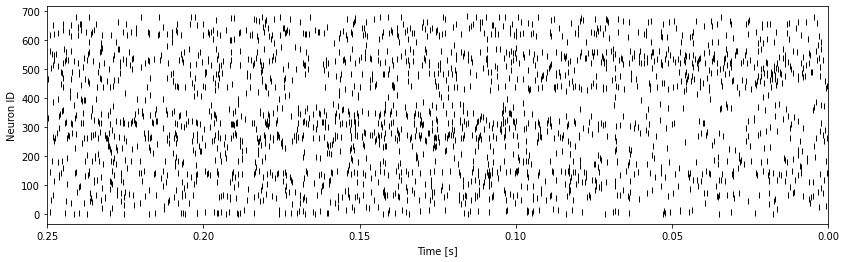

In [29]:
raster(spike_times, ii_spike_times, epoch_id = 0, xrange=(t_stop, t_start))

**Spike Count (SC)**

In [30]:
def get_spike_count_per_epoch(spike_times, ii_spike_times, normalized=''):
    '''
    Spike Count per trial (Raw SC). 
    If `normalized` is equal to 'zscore', it return the z-scored spike counts.
    '''
    spike_count_per_epoch = np.zeros((ii_spike_times.shape[0], ii_spike_times.shape[1]), dtype=np.float32)
    for i_e in range(ii_spike_times.shape[0]):
        for i_n in range(ii_spike_times.shape[1]):#n_selected_neurons):
            tmp_spks = spike_times[ii_spike_times[i_e,i_n,0]:ii_spike_times[i_e,i_n,1]]
            spike_count_per_epoch[i_e, i_n] = len(tmp_spks)
        
    if normalized=='zscore':
        for i_n in range(ii_spike_times.shape[1]):
            if np.std(spike_count_per_epoch[:, i_n])>0:
                spike_count_per_epoch[:, i_n] = (spike_count_per_epoch[:, i_n] - np.mean(spike_count_per_epoch[:, i_n])) / np.std(spike_count_per_epoch[:, i_n])
            
    return spike_count_per_epoch

In [31]:
def euclidean_dist(st1, st2):
    '''
    Euclidean distance between two spike trains `st1` and `st2`.
    '''
    ret = 0.
    for ii in range(len(st1)):
        ret += (st1[ii]-st2[ii])**2 # sum
    
    return np.sqrt(ret)

def diss_spike_counts(SC):
    '''
    Dissimilarity Matrix between spike count vectors via Euclidean distance.
    '''
    diss_spike_count = np.zeros((SC.shape[0], SC.shape[0]))
    for i_e1 in range(SC.shape[0]):
        for i_e2 in range(i_e1, SC.shape[0]):
            diss_spike_count[i_e1, i_e2] = euclidean_dist(SC[i_e1], SC[i_e2])
            diss_spike_count[i_e2, i_e1] = diss_spike_count[i_e1, i_e2]
    return diss_spike_count

In [32]:
# let's compute spike count per trial
SC = get_spike_count_per_epoch(spike_times, ii_spike_times)

In [34]:
# Computing dissimilarity matrix (Euclidean distance of Spike count vectors)
dissimilarities = diss_spike_counts(SC)

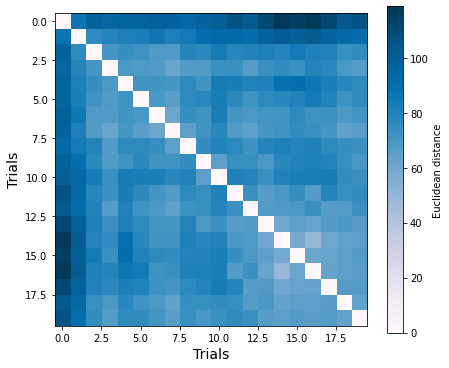

In [35]:
fs = 14 # fontsize
plt.figure(figsize=(7,6))
plt.imshow(dissimilarities, cmap='PuBu'); plt.xlabel('Trials',fontsize=fs); plt.ylabel('Trials',fontsize=fs)
_ = plt.colorbar(label='Euclidean distance')

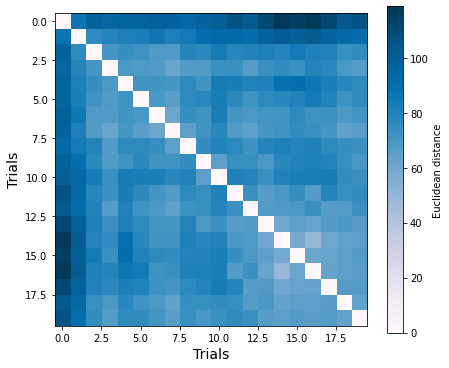

In [36]:
fs = 14 # fontsize
plt.figure(figsize=(7,6))
plt.imshow(dissimilarities, cmap='PuBu'); plt.xlabel('Trials',fontsize=fs); plt.ylabel('Trials',fontsize=fs)
_ = plt.colorbar(label='Euclidean distance')

## TODO:
